# 用电预测---时间与功率的关系

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [19]:
#导入原始数据
f=open(r"E:\python\机器学习\线性回归\02_代码\datas\household_power_consumption_1000.txt")
df=pd.read_csv(f,sep=';')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [20]:
#数据清洗
new_df=df.replace('?',np.nan) #将非法字符换成空值
datas=new_df.dropna(axis=0) #将空值按行删除
datas.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.0,1000.000000,1000.000000
mean,2.418772,0.089232,240.03579,10.351000,0.0,2.749000,5.756000
std,1.239979,0.088088,4.08442,5.122214,0.0,8.104053,8.066941
min,0.206000,0.000000,230.98000,0.800000,0.0,0.000000,0.000000
25%,1.806000,0.000000,236.94000,8.400000,0.0,0.000000,0.000000
50%,2.414000,0.072000,240.65000,10.000000,0.0,0.000000,0.000000
75%,3.308000,0.126000,243.29500,14.000000,0.0,1.000000,17.000000
max,7.706000,0.528000,249.37000,33.200000,0.0,38.000000,19.000000


In [21]:
#提取特征值X与Y
#创建一个时间格式化函数
import time
def data_format(dt):
    t=time.strptime(' '.join(dt),'%d/%m/%Y %H:%M:%S')#转换为时间元祖
    return (t.tm_year,t.tm_mon,t.tm_mday,t.tm_hour,t.tm_min,t.tm_sec)

In [22]:
X=datas.iloc[:,0:2]
x=X.apply(lambda x:pd.Series(data_format(x)),axis=1)
x.head()

,0,1,2,3,4,5
0,2006,12,16,17,24,0
1,2006,12,16,17,25,0
2,2006,12,16,17,26,0
3,2006,12,16,17,27,0
4,2006,12,16,17,28,0


In [23]:
y=datas['Global_active_power']
y.head()

0    4.216
1    5.360
2    5.374
3    5.388
4    3.666
Name: Global_active_power, dtype: float64

In [24]:
#划分数据集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
#标准化
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [26]:
#建立模型并且训练
lr=LinearRegression()#最小二乘法
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
#预测
y_predict=lr.predict(x_test)
#评估
lr.score(x_test,y_test)

0.12551628513735824

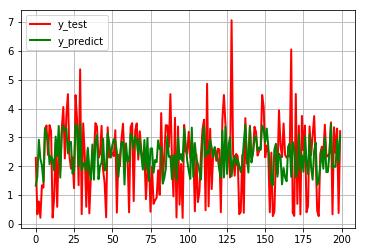

In [28]:
#画图
plt.plot(range(200),y_test,'r-',linewidth=2,label='y_test')
plt.plot(range(200),y_predict,'g-',linewidth=2,label='y_predict')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# 功率与电流

In [29]:
x1=datas.iloc[:,2:4]
y1=datas.iloc[:,5]
y1.head()

0    18.4
1    23.0
2    23.0
3    23.0
4    15.8
Name: Global_intensity, dtype: float64

In [30]:
#划分数据集
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=0)

In [31]:
#标准化
ss1=StandardScaler()
x1_train=ss1.fit_transform(x1_train)
x1_test=ss1.transform(x1_test)

In [32]:
#建模
lr1=LinearRegression()
lr1.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
#预测
y_predict1=lr1.predict(x1_test)
#评估
lr1.score(x1_test,y1_test)

0.9920420609708968

In [37]:
from sklearn.metrics import r2_score #r**2
a=[1,2,3]
b=[1,2,3]
r2_score(y1_test,y_predict1)

0.9920420609708968

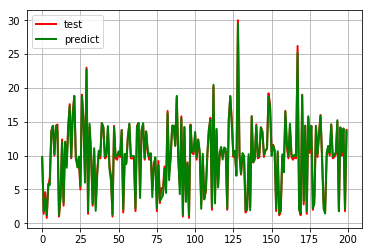

In [34]:
#作图
plt.plot(range(200),y1_test,'r-',linewidth=2,label='test')
plt.plot(range(200),y_predict1,'g-',linewidth=2,label='predict')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()